# **Stock (IHSG/JKSE) - Pre-Processing & Descriptive Analysis**

## **Data Load & Understanding**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [44]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock (IHSG) Prediction/Data/jkse_data.csv'
df = pd.read_csv(dataset)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-04,6118.633789,6152.859863,6118.469238,6152.859863,6152.859863,65189800.0
1,2018-12-05,6097.644043,6133.120117,6064.832031,6133.120117,6133.120117,67897200.0
2,2018-12-06,6095.006836,6131.631836,6086.131836,6115.493164,6115.493164,65929300.0
3,2018-12-07,6108.950195,6141.470215,6103.176758,6126.355957,6126.355957,66079200.0
4,2018-12-10,6103.097168,6121.780762,6078.631836,6111.359863,6111.359863,56866400.0
...,...,...,...,...,...,...,...
1229,2023-11-27,7009.630859,7061.827148,7008.812988,7013.405762,7013.405762,163462500.0
1230,2023-11-28,7013.405762,7067.143066,7010.825195,7041.073242,7041.073242,167633600.0
1231,2023-11-29,7041.073242,7070.190918,7020.012207,7036.086914,7036.086914,167555900.0
1232,2023-11-30,7036.086914,7109.608887,7036.086914,7080.741211,7080.741211,259745500.0


In [46]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1218 non-null   float64
 2   High       1218 non-null   float64
 3   Low        1218 non-null   float64
 4   Close      1218 non-null   float64
 5   Adj Close  1218 non-null   float64
 6   Volume     1218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [47]:
# Check the number of columns and rows in the data
df.shape

(1234, 7)

In [48]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,6305.584139,6338.776817,6267.094192,6303.348213,6303.348213,1.465246e+08
std,667.739135,664.176489,672.017753,667.812495,667.812495,6.724711e+07
min,3937.632080,4123.562012,3911.716064,3937.632080,3937.632080,0.000000e+00
25%,6063.450684,6101.525147,6026.587158,6065.295044,6065.295044,9.839610e+07
50%,6395.268555,6423.794922,6367.615967,6390.169433,6390.169433,1.455804e+08
75%,6829.235962,6865.478149,6797.982300,6826.489136,6826.489136,1.878784e+08
max,7317.895996,7377.495117,7278.198242,7318.016113,7318.016113,6.150719e+08


In [49]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-04,6118.633789,6152.859863,6118.469238,6152.859863,6152.859863,65189800.0
1,2018-12-05,6097.644043,6133.120117,6064.832031,6133.120117,6133.120117,67897200.0
2,2018-12-06,6095.006836,6131.631836,6086.131836,6115.493164,6115.493164,65929300.0
3,2018-12-07,6108.950195,6141.470215,6103.176758,6126.355957,6126.355957,66079200.0
4,2018-12-10,6103.097168,6121.780762,6078.631836,6111.359863,6111.359863,56866400.0
5,2018-12-11,6095.349121,6106.984863,6069.161133,6076.586914,6076.586914,71781900.0
6,2018-12-12,6097.730957,6118.226074,6084.338867,6115.577148,6115.577148,79263500.0
7,2018-12-13,6140.875977,6186.046875,6139.332031,6177.720215,6177.720215,82093700.0
8,2018-12-14,6178.566895,6185.479980,6160.352051,6169.842773,6169.842773,61924800.0
9,2018-12-17,6163.627930,6174.220215,6089.305176,6089.305176,6089.305176,61873200.0


In [50]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2023-11-20,6977.667969,7011.059082,6962.750977,6994.888184,6994.888184,150491900.0
1225,2023-11-21,6994.888184,7010.978027,6946.960938,6961.790039,6961.790039,160615900.0
1226,2023-11-22,6961.790039,6965.411133,6893.506836,6906.953125,6906.953125,181914600.0
1227,2023-11-23,6907.088867,7018.429199,6906.609863,7004.344238,7004.344238,219080000.0
1228,2023-11-24,7004.479980,7049.541016,7000.097168,7009.630859,7009.630859,181146200.0
1229,2023-11-27,7009.630859,7061.827148,7008.812988,7013.405762,7013.405762,163462500.0
1230,2023-11-28,7013.405762,7067.143066,7010.825195,7041.073242,7041.073242,167633600.0
1231,2023-11-29,7041.073242,7070.190918,7020.012207,7036.086914,7036.086914,167555900.0
1232,2023-11-30,7036.086914,7109.608887,7036.086914,7080.741211,7080.741211,259745500.0
1233,2023-12-01,7080.061035,7083.855957,7022.765137,7059.905762,7059.905762,265990100.0


In [51]:
# View the max value of each column
max_column = df.max()
print("Max value of each column:")
print(max_column)

# View the min value of each column
min_column = df.min()
print("Min value of each column:")
print(min_column)

# View the mean value of each column
mean_column = df.mean()
print("Mean value of each column:")
print(mean_column)

Max value of each column:
Date          2023-12-01
Open         7317.895996
High         7377.495117
Low          7278.198242
Close        7318.016113
Adj Close    7318.016113
Volume       615071900.0
dtype: object
Min value of each column:
Date          2018-12-04
Open          3937.63208
High         4123.562012
Low          3911.716064
Close         3937.63208
Adj Close     3937.63208
Volume               0.0
dtype: object
Mean value of each column:
Open         6.305584e+03
High         6.338777e+03
Low          6.267094e+03
Close        6.303348e+03
Adj Close    6.303348e+03
Volume       1.465246e+08
dtype: float64


<ipython-input-51-b1b8b4e0335d>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_column = df.mean()


## **Data Cleaning**

### **Detecting Outlier**

In [52]:
df_num = df.select_dtypes(include = ['float'])

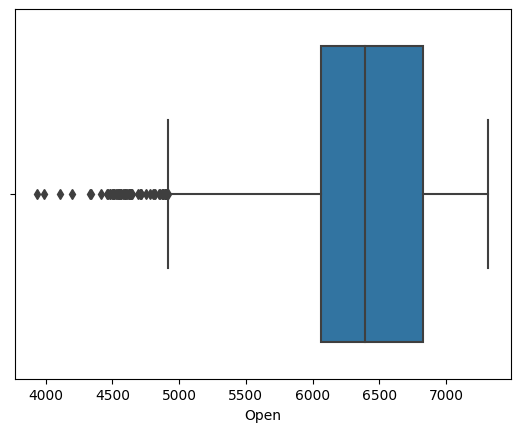

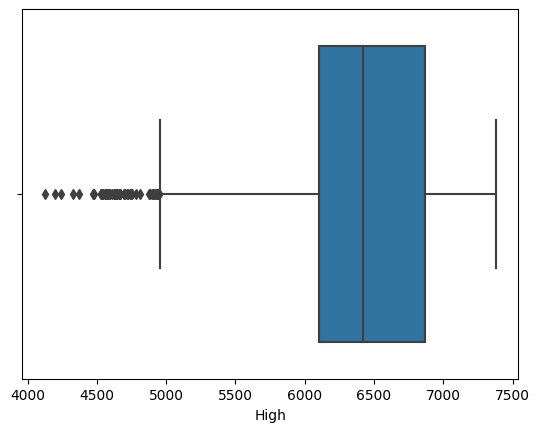

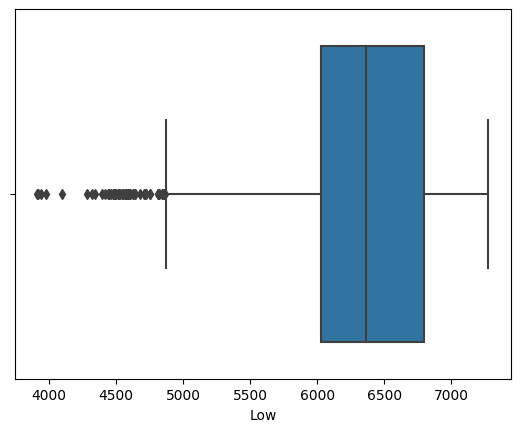

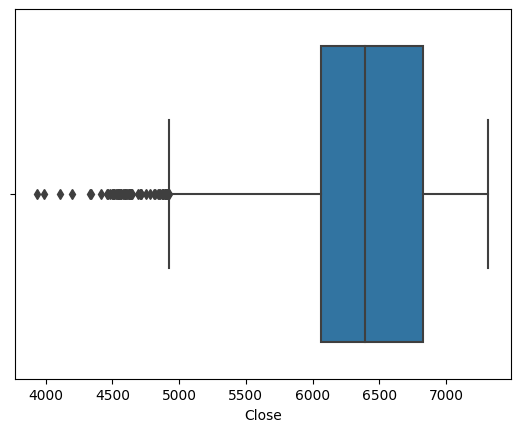

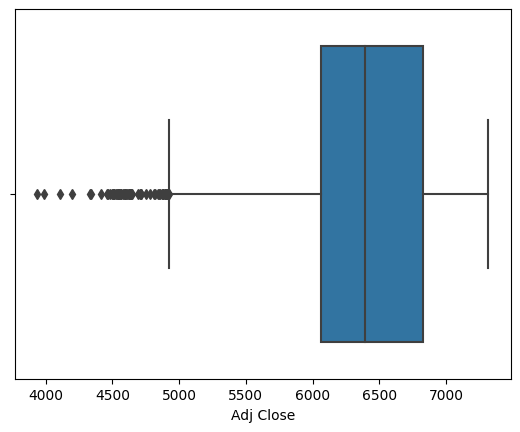

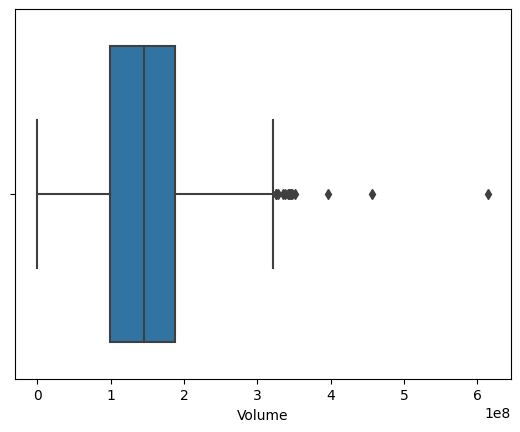

In [53]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [54]:
# Function to identify outliers using the IQR method
def find_outliers_iqr(column):
    if df[column].dtype in ['float']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Identify columns with outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

# Strategy for handling outliers: Delete rows containing outliers
for column in columns_with_outliers:
    outliers = find_outliers_iqr(column)
    df = df.drop(outliers.index)

In [55]:
# Display columns with outliers and number of outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:
Open: 65 outliers
High: 62 outliers
Low: 62 outliers
Close: 69 outliers
Adj Close: 69 outliers
Volume: 14 outliers


In [56]:
df['Open']

0       6118.633789
1       6097.644043
2       6095.006836
3       6108.950195
4       6103.097168
           ...     
1229    7009.630859
1230    7013.405762
1231    7041.073242
1232    7036.086914
1233    7080.061035
Name: Open, Length: 1125, dtype: float64

In [57]:
df.isna().sum()

Date          0
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

### **Data Type Transformation**


In [58]:
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1125 non-null   datetime64[ns]
 1   Open       1109 non-null   float64       
 2   High       1109 non-null   float64       
 3   Low        1109 non-null   float64       
 4   Close      1109 non-null   float64       
 5   Adj Close  1109 non-null   float64       
 6   Volume     1109 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 70.3 KB


### **Handling Missing Value**

In [60]:
df.fillna(df.mean(), inplace=True)

<ipython-input-60-bf934754a5b1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


In [61]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Data Visualization**

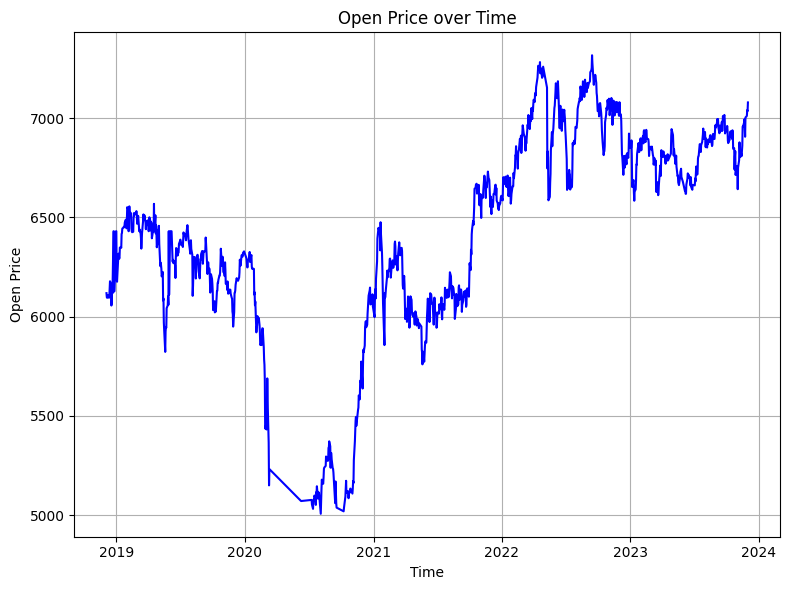

In [69]:
# Create a line graph (Open vs Date)
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Open'], linestyle='-', color='b')

# Label the x and y axes
plt.xlabel('Time')
plt.ylabel('Open Price')

# Chart title
plt.title('Open Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

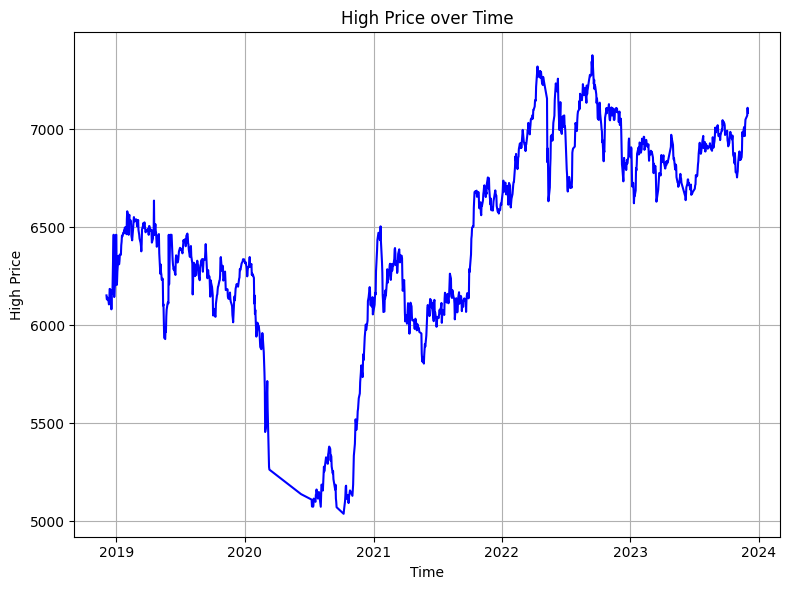

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['High'], linestyle='-', color='b')

# Label the x and y axes
plt.xlabel('Time')
plt.ylabel('High Price')

# Chart title
plt.title('High Price over Time')

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

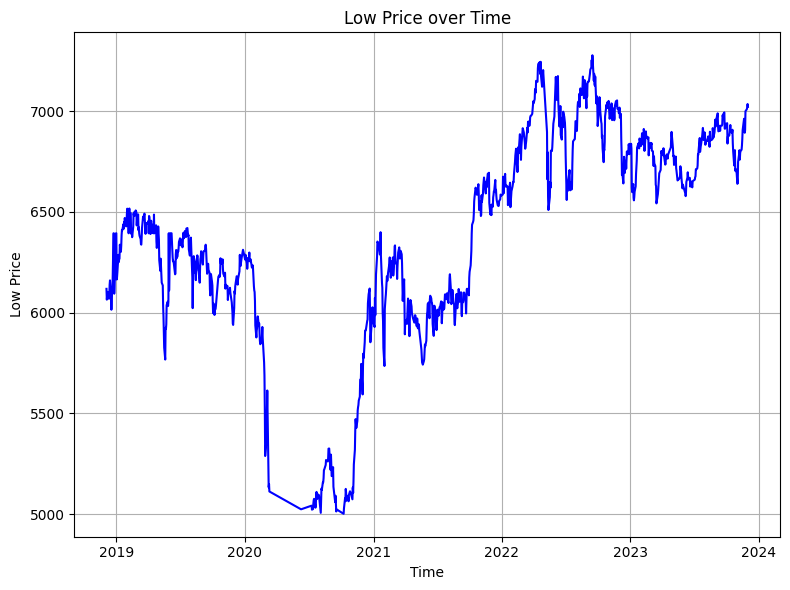

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Low'], linestyle='-', color='b')

# Label the x and y axes
plt.xlabel('Time')
plt.ylabel('Low Price')

# Chart title
plt.title('Low Price over Time')

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

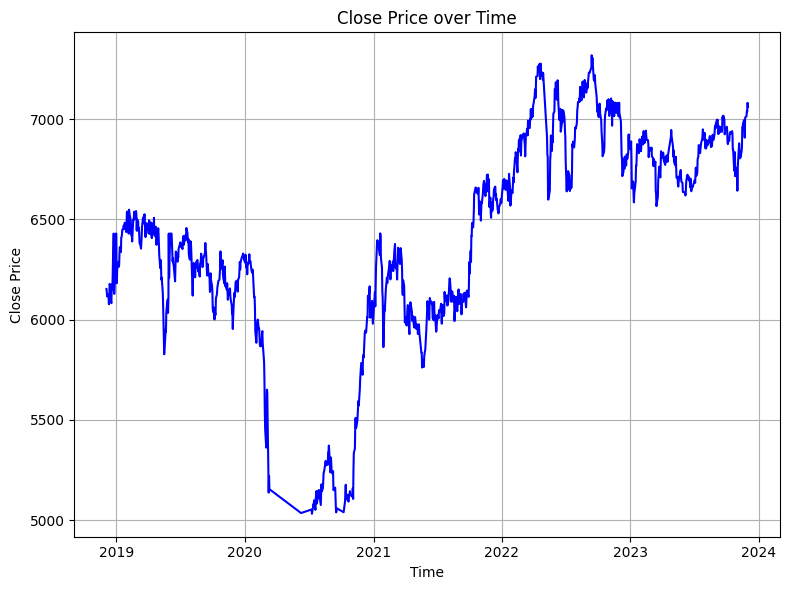

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')

# Memberi label sumbu x dan y
plt.xlabel('Time')
plt.ylabel('Close Price')

# Judul grafik
plt.title('Close Price over Time')

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

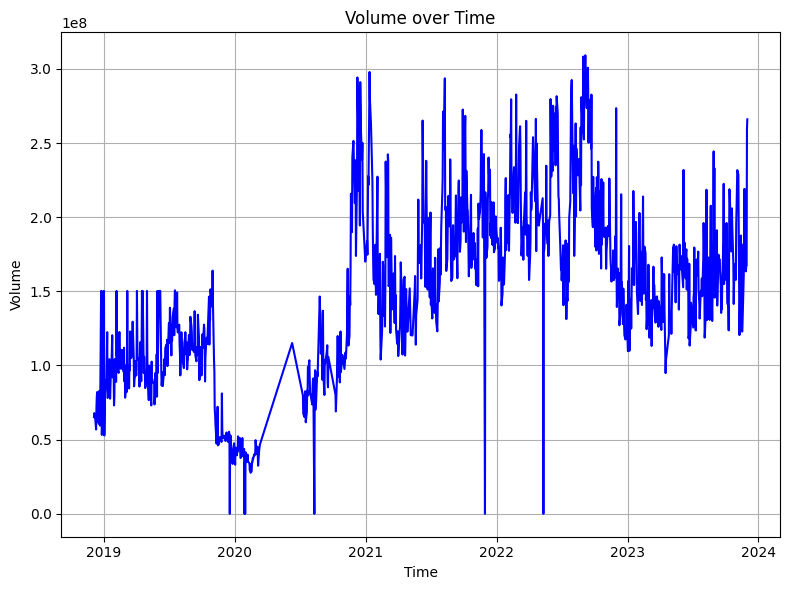

In [73]:
# Create a line graph (Open vs Date)
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Volume'], linestyle='-', color='b')

# Label the x and y axes
plt.xlabel('Time')
plt.ylabel('Volume')

# Chart title
plt.title('Volume over Time')

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

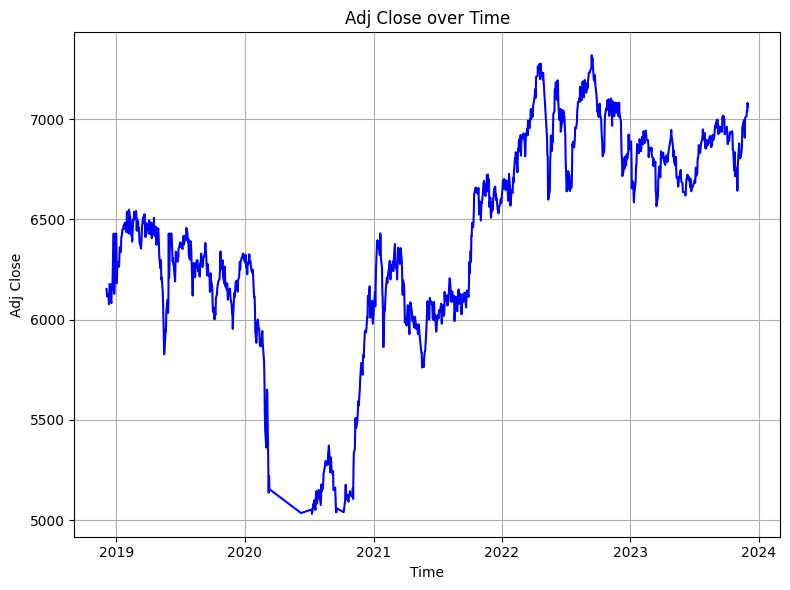

In [74]:
# Create a line graph (Open vs Date)
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Adj Close'], linestyle='-', color='b')

# Label the x and y axes
plt.xlabel('Time')
plt.ylabel('Adj Close')

# Chart title
plt.title('Adj Close over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

## **Saving Cleaned Data to csv**

In [68]:
df.to_csv('jkse_data_cleaned.csv', index=False)